### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r"Admission_Predict.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop("Serial No.",axis=1, inplace=True) #inplace drops the column from the memory
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Performing Exploratory Data Analysis

In [4]:
# checking the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Grouping by University ranking 
uni_df= df.groupby(by = "University Rating").mean()
uni_df

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Perform Data Visualisation

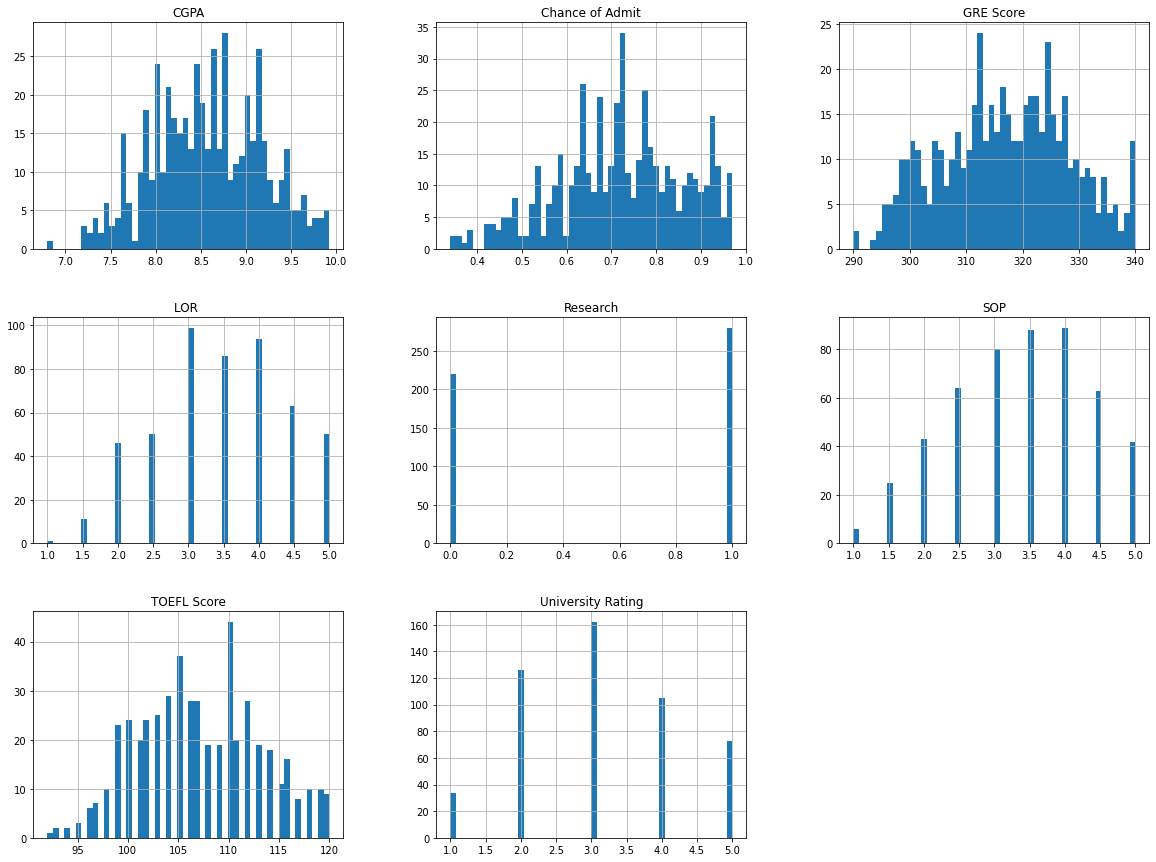

In [7]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
len(df)

500

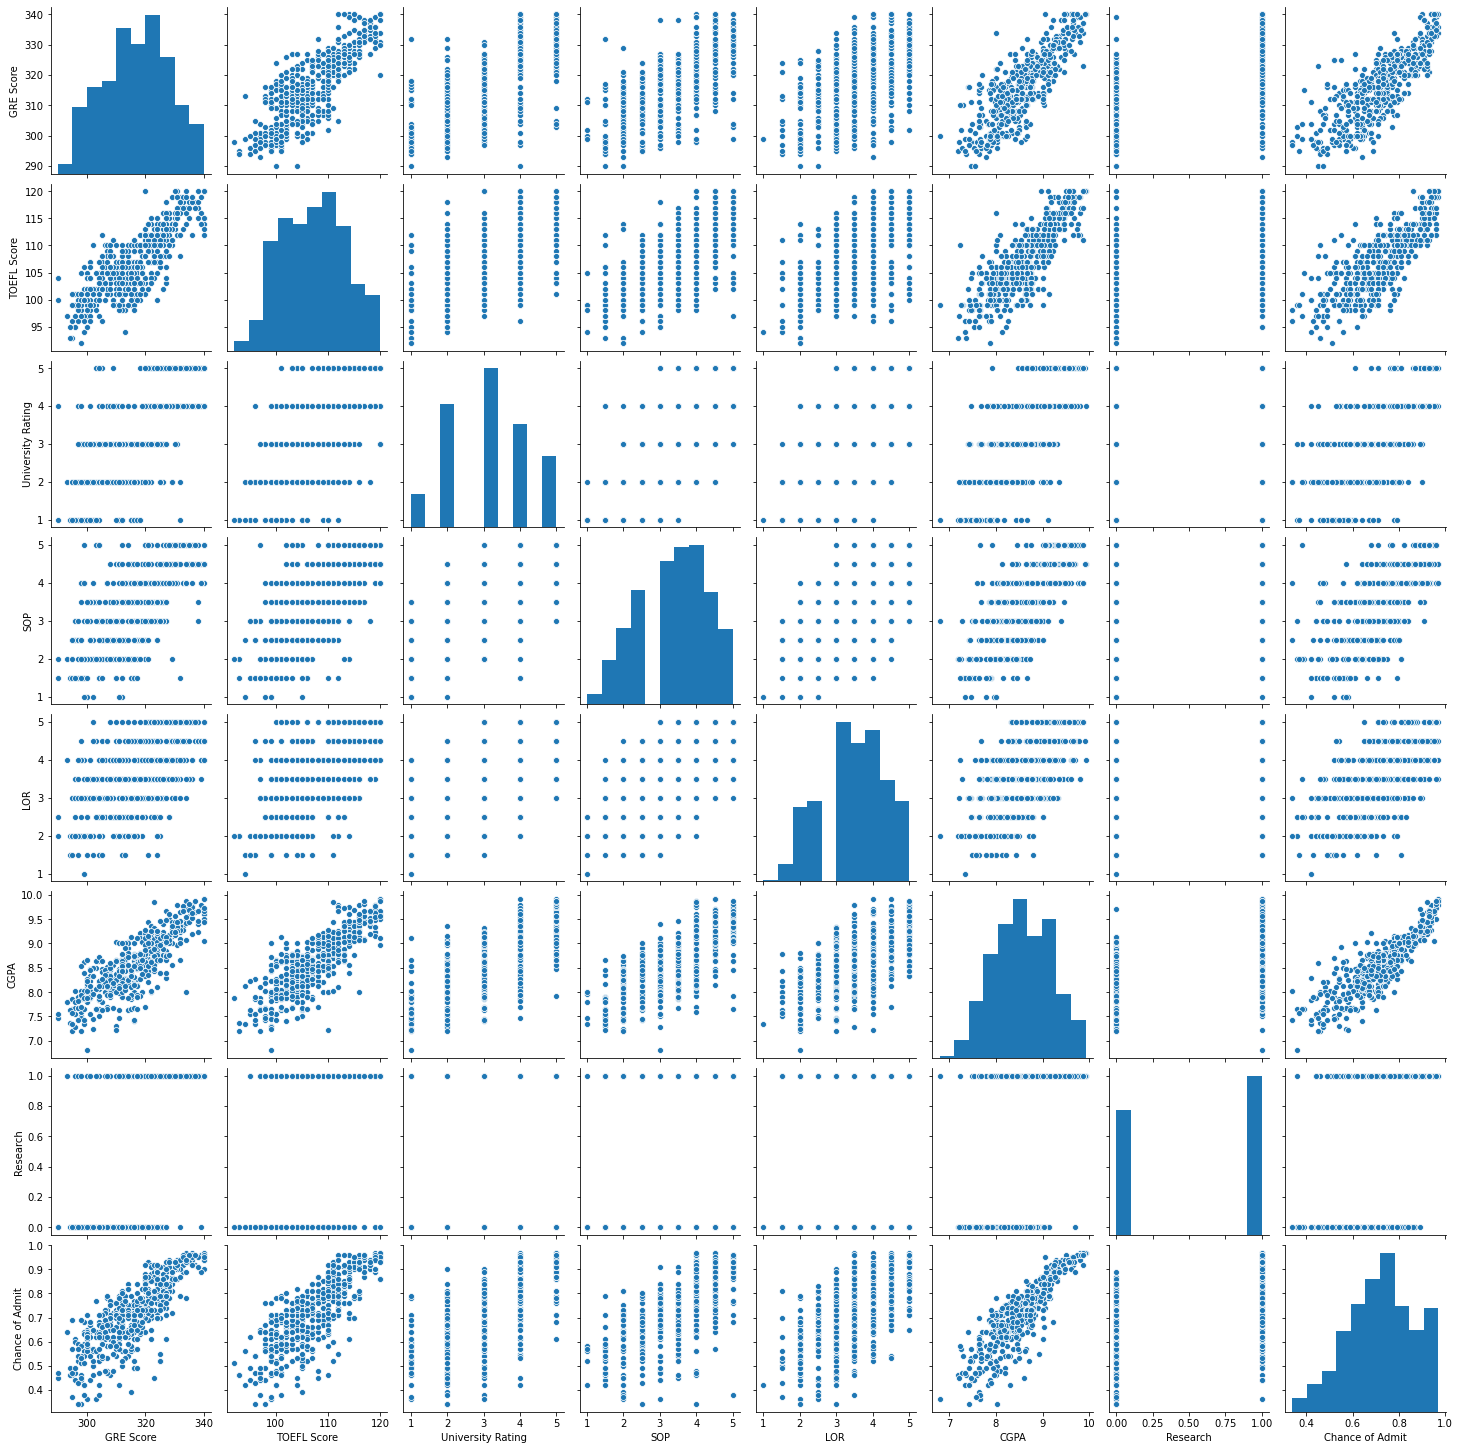

In [9]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4858D48B0>,
      dtype=object)

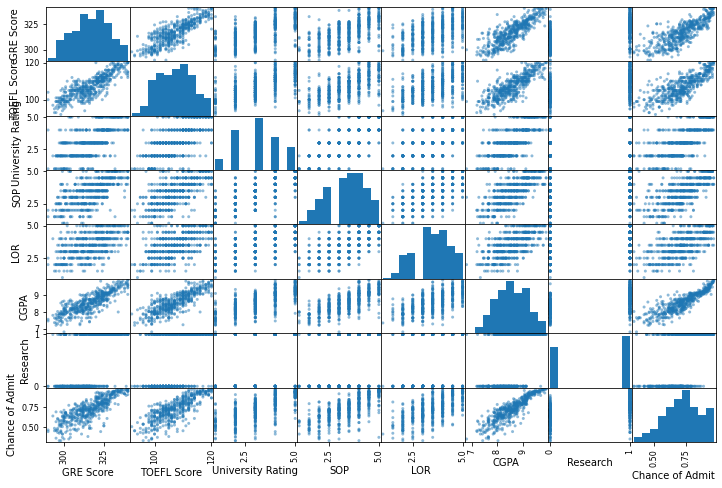

In [10]:
#alternative
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,8))

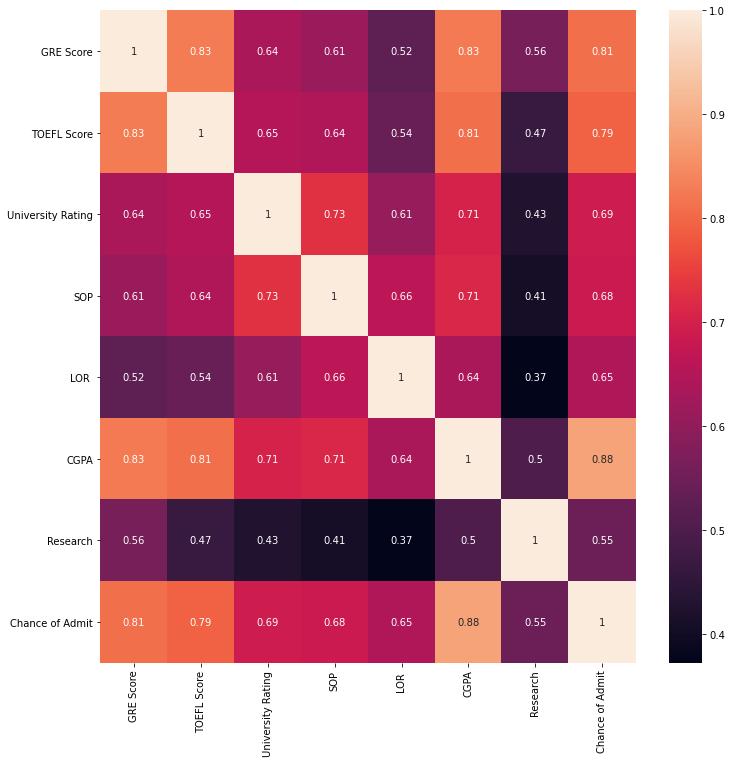

In [11]:
corr_matrix=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot = True)

### Creating training and test dataset

In [12]:
df["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index, test_index in split.split(df,df["University Rating"]):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
def uni_rankings(data):
    return data["University Rating"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": uni_rankings(df),
    "Stratified": uni_rankings(strat_test_set),
    "Random": uni_rankings(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.068,0.066667,0.07,2.941176,-1.960784
2,0.252,0.253333,0.25,-0.793651,0.529101
3,0.324,0.320000,0.30,-7.407407,-1.234568
4,0.210,0.213333,0.25,19.047619,1.587302
5,0.146,0.146667,0.13,-10.958904,0.456621


In [17]:
df= strat_train_set.copy()

In [18]:
Feature = strat_train_set.drop("Chance of Admit",axis = 1)
label= strat_train_set["Chance of Admit"].copy()
Feature_test = strat_test_set.drop("Chance of Admit",axis = 1)
label_test= strat_test_set["Chance of Admit"].copy()

In [19]:
Feature=np.array(Feature)
label=np.array(label)
label=label.reshape(-1,1)
label.shape

(425, 1)

In [20]:
Featur_test=np.array(Feature_test)
label_test=np.array(label_test)
label_test=label_test.reshape(-1,1)
label_test.shape

(75, 1)

In [21]:
#Scaling the data so that the model does not get biased
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
Feature_tr= std_scaler.fit_transform(Feature)
label_tr= std_scaler.fit_transform(label)


In [22]:
Feature_test_tr= std_scaler.fit_transform(Feature_test)
label_test_tr= std_scaler.fit_transform(label_test)

### Training and evaluating a linear regression model

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(Feature_tr,label)

LinearRegression()

In [24]:
some_data= Feature[:5]
some_labels=label[:5]
some_data_tr=std_scaler.fit_transform(some_data)
print("Predictions:\t",lin_reg.predict(some_data_tr))
print("Labels:\t\t",list(some_labels))

Predictions:	 [[0.74674851]
 [0.88524747]
 [0.62405537]
 [0.80271383]
 [0.5559407 ]]
Labels:		 [array([0.8]), array([0.94]), array([0.78]), array([0.89]), array([0.75])]


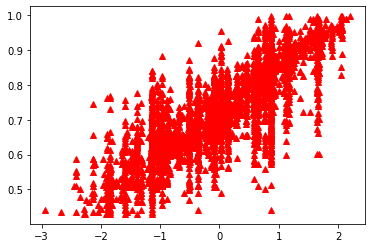

In [25]:
from sklearn.metrics import mean_squared_error,accuracy_score
lin_adm_predictions = lin_reg.predict(Feature_tr)
plt.plot(Feature_tr,lin_adm_predictions,'^',color="r")

In [27]:
lin_acc=lin_reg.score(Feature_test_tr,label_test)
print("Accuracy:",lin_acc)

Accuracy: 0.827449689911894


In [28]:
from sklearn.model_selection import cross_val_score
lin_scores= cross_val_score(lin_reg,Feature_tr, label, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("RMSE:",lin_rmse_scores)

RMSE: [0.06701679 0.06469914 0.04929992 0.05903165 0.06217158 0.05621029
 0.0572475  0.05316929 0.07458628 0.06687131]


### Training and evaluating an artificial neural network

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [30]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [31]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [32]:
epochs_hist = ANN_model.fit(Feature_tr, label_tr, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 11ms/step - loss: 0.5164 - val_loss: 0.2610
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3064 - val_loss: 0.3694
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2688 - val_loss: 0.3078
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2565 - val_loss: 0.2961
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2599 - val_loss: 0.3477
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2409 - val_loss: 0.2881
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2402 - val_loss: 0.3170
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2127 - val_loss: 0.2924
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2017 - val_loss: 0.3477
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1968 - val_loss: 0.2947
Epoch 11

17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.3062
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - val_loss: 0.3216
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - val_loss: 0.3062
Epoch 86/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - val_loss: 0.3393
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1073 - val_loss: 0.3134
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - val_loss: 0.2970
Epoch 89/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - val_loss: 0.3085
Epoch 90/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - val_loss: 0.3280
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - val_loss: 0.3271
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.3120
Epoch 93/100


In [33]:
result = ANN_model.evaluate(Feature_test_tr, label_test_tr)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 1ms/step - loss: 0.1837
Accuracy : 0.8163153529167175


In [34]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

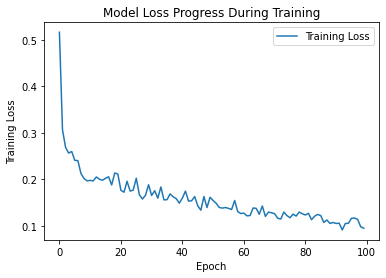

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

### Training and evaluating a decision tree and random forest model

In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(Feature_tr,label)


DecisionTreeRegressor()

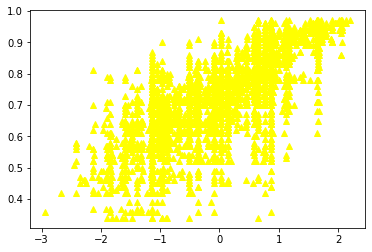

In [37]:
tree_adm_predictions = tree_reg.predict(Feature_tr)
plt.plot(Feature_tr,tree_adm_predictions,'^',color="yellow")

In [38]:
tree_acc=tree_reg.score(Feature_test_tr,label_test)
print("Accuracy:",tree_acc)

Accuracy: 0.6427744611729522


In [39]:
tree_scores= cross_val_score(tree_reg,Feature_tr, label, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("RMSE:",tree_rmse_scores)

RMSE: [0.08677691 0.09888918 0.08941671 0.09983708 0.09042535 0.0780415
 0.09869385 0.10764802 0.1157995  0.09178131]


In [40]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
randf_reg=RandomForestRegressor()
randf_reg.fit(Feature_tr,label)

<ipython-input-40-55b16624bdd7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_reg.fit(Feature_tr,label)


RandomForestRegressor()

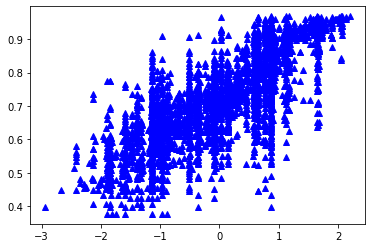

In [41]:
randf_adm_predictions = randf_reg.predict(Feature_tr)
plt.plot(Feature_tr,randf_adm_predictions,'^',color="blue")

In [42]:
randf_acc=randf_reg.score(Feature_test_tr,label_test)
print("Accuracy:",randf_acc)

Accuracy: 0.836778620264983


In [43]:
randf_scores= cross_val_score(randf_reg,Feature_tr, label, scoring="neg_mean_squared_error",cv=10)
randf_rmse_scores = np.sqrt(-randf_scores)
print("RMSE:",randf_rmse_scores)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

RMSE: [0.0718721  0.06718418 0.053968   0.06936446 0.07055624 0.05979024
 0.06598204 0.05937731 0.08714991 0.08134094]


C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


C:\Users\samee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


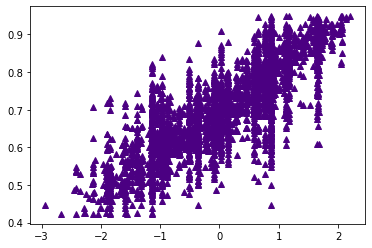

In [44]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(Feature_tr,label)
svm_adm_predictions = svm_reg.predict(Feature_tr)
plt.plot(Feature_tr,svm_adm_predictions,'^',color="indigo")


In [45]:
svm_acc=svm_reg.score(Feature_test_tr,label_test)
print("Accuracy:",svm_acc)

Accuracy: 0.8093884150865454


In [46]:
svm_scores= cross_val_score(randf_reg,Feature_tr, label, scoring="neg_mean_squared_error",cv=10)
svm_rmse_scores = np.sqrt(-randf_scores)
print("RMSE:",randf_rmse_scores)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

RMSE: [0.0718721  0.06718418 0.053968   0.06936446 0.07055624 0.05979024
 0.06598204 0.05937731 0.08714991 0.08134094]
